**שימו לב**: על מנת להריץ את התאים ב-Live Code, יש לייבא תחילה את ספרית `pandas` ע"י הרצת השורת הראשונה בתא למטה.   
בנוסף, נגביל את מספר השורות והעמודות שתופענה בהדפסת הטבלאות ע"י שורות הקוד השניה והשלישית:

In [2]:
import pandas as pd
pd.options.display.max_rows=5
pd.options.display.max_columns=5
import utils.load_auxilary_files # This will load the files used for this notebook

## הצגת נתוני טבלאות בגרפים 

לעיתים קשה להבין נתונים רק מקריאה של טבלאות, במיוחד כשמדובר בכמות גדולה של מספרים.   
הצגה חזותית של הנתונים מאפשרת לזהות בקלות דפוסים, מגמות והבדלים בין קבוצות – דברים שקשה להבחין בהם מתוך טבלה בלבד.   
לדוגמא, גרף יכול לחשוף מיד פערים בממוצע הציונים בין תארים שונים, גם כאשר מדובר באלפי סטודנטים.

בפייתון קיימות ספריות רבות ליצירת תרשימים וגרפים, ביניהן `matplotlib` ו־`seaborn`. ספריית `pandas` משתלבת באופן הדוק עם `matplotlib`, ומאפשרת ליצור גרפים ישירות מתוך אובייקט `DataFrame`, בצורה פשוטה ונוחה.

ביחידה זו נלמד כיצד להציג נתונים בצורה גרפית באמצעות `matplotlib`, ונראה כיצד להשתמש בה כדי להמחיש תובנות מתוך הנתונים שלנו.


תחילה נייבא את ספריית `matplotlib`:

In [3]:
import matplotlib.pyplot as plt

```{admonition} **שימו לב** 
:class: error

שימו לב שייבאנו חלק ספציפי של הספריה (שנקרא `pyplot`). לאחר הייבוא, נוכל לקרוא לחלק זה באמצעות הקיצור `plt`.

```

## תבנית לציור גרפים ב`matplotlib`

כדי לצייר גרף בפייתון באמצעות `matplotlib`, נשתמש בתבנית קוד בסיסית שחוזרת כמעט בכל סוג של תרשים, ומורכבת מארבעה שלבים עיקריים:

1. **יצירת הקנבס (Canvas)** – ניצור את המסגרת שעליה נצייר את הגרף בעזרת הפקודה `()fig, ax = plt.subplots`. ניתן גם לקבוע את גודל התרשים באמצעות הפרמטר `figsize` (לדוגמה `figsize=(4,3)`).
2. **ציור התרשים עצמו** – נשתמש במתודה המתאימה לסוג הגרף שנרצה להציג. בחלק זה נתעמק בהמשך היחידה.
3. **הוספת מקרא (Legend)** – נשתמש ב־`()plt.legend` כדי להציג מקרא שמקשר בין הצבעים לסדרות הנתונים שבגרף.
4. **הצגת הגרף** – לבסוף, נשתמש ב־`()plt.show` כדי להציג את התרשים בפועל על המסך.

תבנית זו תשמש אותנו בכל פעם שנרצה לשרטט גרף חדש. **עליכם לקרוא את התיעוד של הפונקציות המשרטטות גרפים שונים ולהבין את משמעות הפרמטרים המרכזיים במתודות השונות – הם קובעים אילו נתונים יוצגו, כיצד, ובאיזה סגנון**. 

הדוגמאות בהמשך ממחישות את עקרונות הבסיס של בניית גרפים, אך לכל מתודה קיימים פרמטרים נוספים שמאפשרים שליטה מדויקת במראה התרשים, בצבעים, בצירים ובכיתוב. מומלץ להתנסות ולחקור את האפשרויות כדי להכיר את מלוא הגמישות של `matplotlib`.

```python
fig, ax = plt.subplots() ## Create canvas. figsize=(4,3) sets the size of the figure (optional)
## Draw your plot here. 
plt.legend() # plot the names that each color represents (optional)
plt.show() # Visualize plot
```

נתחיל מטעינת טבלת הציונים שלנו מהקובץ files/StudentsGrades.csv לתוך `df`:

In [4]:
inputFileName = "files/StudentsGrades.csv"
df = pd.read_csv(inputFileName)
display(df)

,Name,Programming,Marine Biology,Stellar Cartography,Math,History,Planet Survival,Art
0,Yael,50,56,70,60,87,65,91
1,Nadav,61,77,75,75,63,52,88
...,...,...,...,...,...,...,...,...
11,Tom,98,76,98,100,98,92,80
12,Adi,76,87,34,90,88,84,70


### גרף קווים - `plot`

נניח שנרצה להציג בצורה גרפית את נתוני הטבלה לגבי ציוני המקצועות תכנות ומתמטיקה. ננסה תחילה להדפיסם כ**גרף קווים (line plot)**: 

גרף קווים הוא אחד מסוגי הגרפים הבסיסיים והשכיחים ביותר להצגת קשר בין שני משתנים בעלי סדר, כמו זמן מול ערך מדידה. בכל נקודה על הגרף מיוצג זוג ערכים, והעקומה המחברת ביניהם מדגישה את השינוי או המגמה לאורך הציר. גרף כזה מאפשר לראות בקלות עליות, ירידות, מגמות כלליות והשוואה בין סדרות נתונים שונות.

בדוגמא נייצר גרף קווים על מנת להציג בצורה חזותית את ציוני מקצועות התכנות והמתמטיקה באמצעות המתודה `plot`:

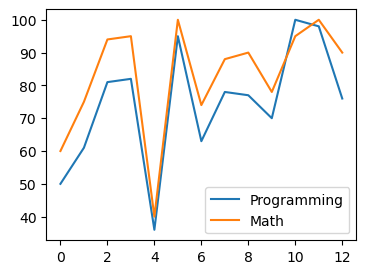

In [14]:
fig, ax = plt.subplots(figsize=(4,3))
columns = ['Programming', 'Math'] 
ax.plot(df.loc[:,columns], label=columns)
plt.legend()
plt.show()

האם הגרף הזה מסביר לדעתכם את הנתונים בצורה הטובה ביותר?

**גרף קווים נועד להמחיש קשר בין שני משתנים בעלי סדר**, כלומר משתנים שניתן לסדרם לפי ערך עולה או יורד, כמו זמן או טמפרטורה.
אמנם לציונים יש סדר - יש ציונים גבוהים יותר ונמוכים יותר. עם זאת, אין סדר טבעי עבור סטודנטים, ולכן גרף קווים **אינו הגרף המתאים למטרה שלנו**.

### תרשים קופסה - `boxplot`

נבחן כעת שימוש בגרף מסוג אחר - Boxplot. **תרשים Boxplot מקבץ נתונים כקבוצות שונות ומציג סיכום סטטיסטי שלהם**. הוא מציג את החציון, את טווח הערכים (מהרבעון התחתון עד הרבעון העליון), ואת הערכים החריגים (outliers) שמשמעותית גבוהים או נמוכים יותר מרוב הנתונים. התרשים מאפשר להבין במבט אחד את פיזור הנתונים, מידת הריכוז שלהם והאם קיימים ערכים חריגים.

כעת נסכם את ציוני התכנות והמתמטיקה בתצוגה זו באמצעות המתודה `boxplot`:

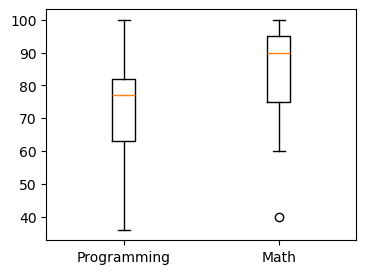

In [6]:
fig, ax = plt.subplots(figsize=(4,3))
columns = ['Programming', 'Math']
ax.boxplot(df.loc[:,columns], tick_labels=columns) # Orange lines are the medians
plt.show()

כפי שניתן לראות, השימוש ב`boxplot` סייע להדגיש את ההבדלים בין המקצועות – ניתן לראות בקלות את המרכז (החציון; בכתום), הפיזור, ואת ה-outliers של כל קבוצה. כך ניתן לזהות מגמות או פערים בין קבוצות שונות במבט אחד.  

החסרון בתרשים `boxplot` הוא שלא ניתן לראות את מספר הערכים בכל תחום, ולכן הוא טוב להבנת מגמות ולא לספירה מדויקת. למשל, לא ניתן לראות פה כמה סטודנטים קיבלו ציון מעל 85.  

### גרף עמודות - `barplot`

אם ברצוננו להציג קשר בין קטגוריה למספר, כמו ממוצע או ספירה, ניתן להשתמש ב**תרשים עמודות (Bar plot)**.   
בתרשים זה גובה כל עמודה מייצג את הערך המספרי של הקטגוריה המתאימה, וכך ניתן להשוות בקלות בין קבוצות שונות.  
היתרון המרכזי של תרשים עמודות הוא הפשטות והבהירות שלו: בעוד ש־Boxplot מספק מבט סטטיסטי כולל (כמו חציון וטווחים), תרשים העמודות מאפשר לזהות מיד את גודל ההבדלים בין קבוצות באופן ישיר וברור לעין.

על מנת לצייר גרף זה, נשתמש במתודה `bar`:

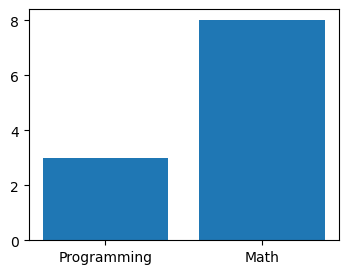

In [12]:
fig, ax = plt.subplots(figsize=(4,3))
columns = ['Programming', 'Math'] 
ax.bar(columns, (df.loc[:,columns]>85).sum())
plt.show()

הגרפים שראינו לאורך היחידה מדגימים כיצד ניתן להפוך נתונים גולמיים מטבלה לייצוג חזותי שמקל על זיהוי תובנות, מגמות והבדלים בין קבוצות – תובנות שקשה יותר להסיק ממבט ישיר על מספרים בלבד.
אפשר לראות בגרפים אלו סוגים שונים של **סיכומים חזותיים** של טבלאות: כל גרף מדגיש היבט אחר של הנתונים.

הכרנו שלושה סוגים עיקריים של תרשימים – גרף עקומות, Boxplot ו-Barplot – ולמדנו לאיזו מטרה כל אחד מהם מתאים, כלומר איזה סוג של "סיכום" או השוואה הוא מספק.

המטרה המרכזית של יחידה זו הייתה להקנות הבנה בסיסית ביצירת גרפים ולחשוף כיצד תצוגה חזותית של נתונים יכולה להפוך מידע מורכב לנגיש וברור.
עם זאת, חשוב לזכור שמה שהוצג כאן הוא רק ההתחלה – קיימים עוד סוגים רבים של גרפים, המאפשרים להציג נתונים מזוויות שונות ולהתאים את אופן ההמחשה לשאלה שאותה אנו רוצים לחקור.

### תרגיל

כתבו קוד המציג גרף המראה כמה סטודנטים קיבלו כל ציון במתמטיקה.
בחרו בעצמכם את סוג התרשים המתאים ביותר להצגת נתונים כאלה, והיעזרו במודל ה-AI האהוב עליכם כדי לגלות **איזו פונקציה גרפית ב־`matplotlib` או ב־`seaborn`** מתאימה למשימה זו ואיך להשתמש בה.
שימו לב להסביר למודל מה ברצונכם להציג (על אילו נתונים, אילו צירים וכו'), ונסו להבין מדוע בחר בפונקציה שהציע.

In [ ]:
# Write your code here

```{admonition} **לחצו כאן כדי לצפות בפתרון**
:class: dropdown, tip

מה עושה הפרמטר `bins`? ודאו זאת באמצעות מודל AI.

```python 
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(df['Math'], bins=10)
plt.show()
```